# 1 Author

**Student Name**:  Yash Desai


**Student ID**:    210480735



# 2 Problem formulation


Starting with an interesting idea a collective effort of all the students we were able to create a labelled dataset of 8 different and famous songs (hums and whistles). With the type of data collected and labelled, a classification problem would best serve the purpose of the dataset. 
For the basic solution, we need to make an ML model which will distinguish between a 'Potter' and a 'StarWars' song. To solve this problem we would need to extract some features like the pitch,mfccs,mel spectogram,chromagram etc. What I find interesting about this is that, we're making a mini version of Shazam! Our model will be able to tell if an audio file is the Harry Potter song or the StarWars' Imperial March.   

# 3 Machine Learning pipeline


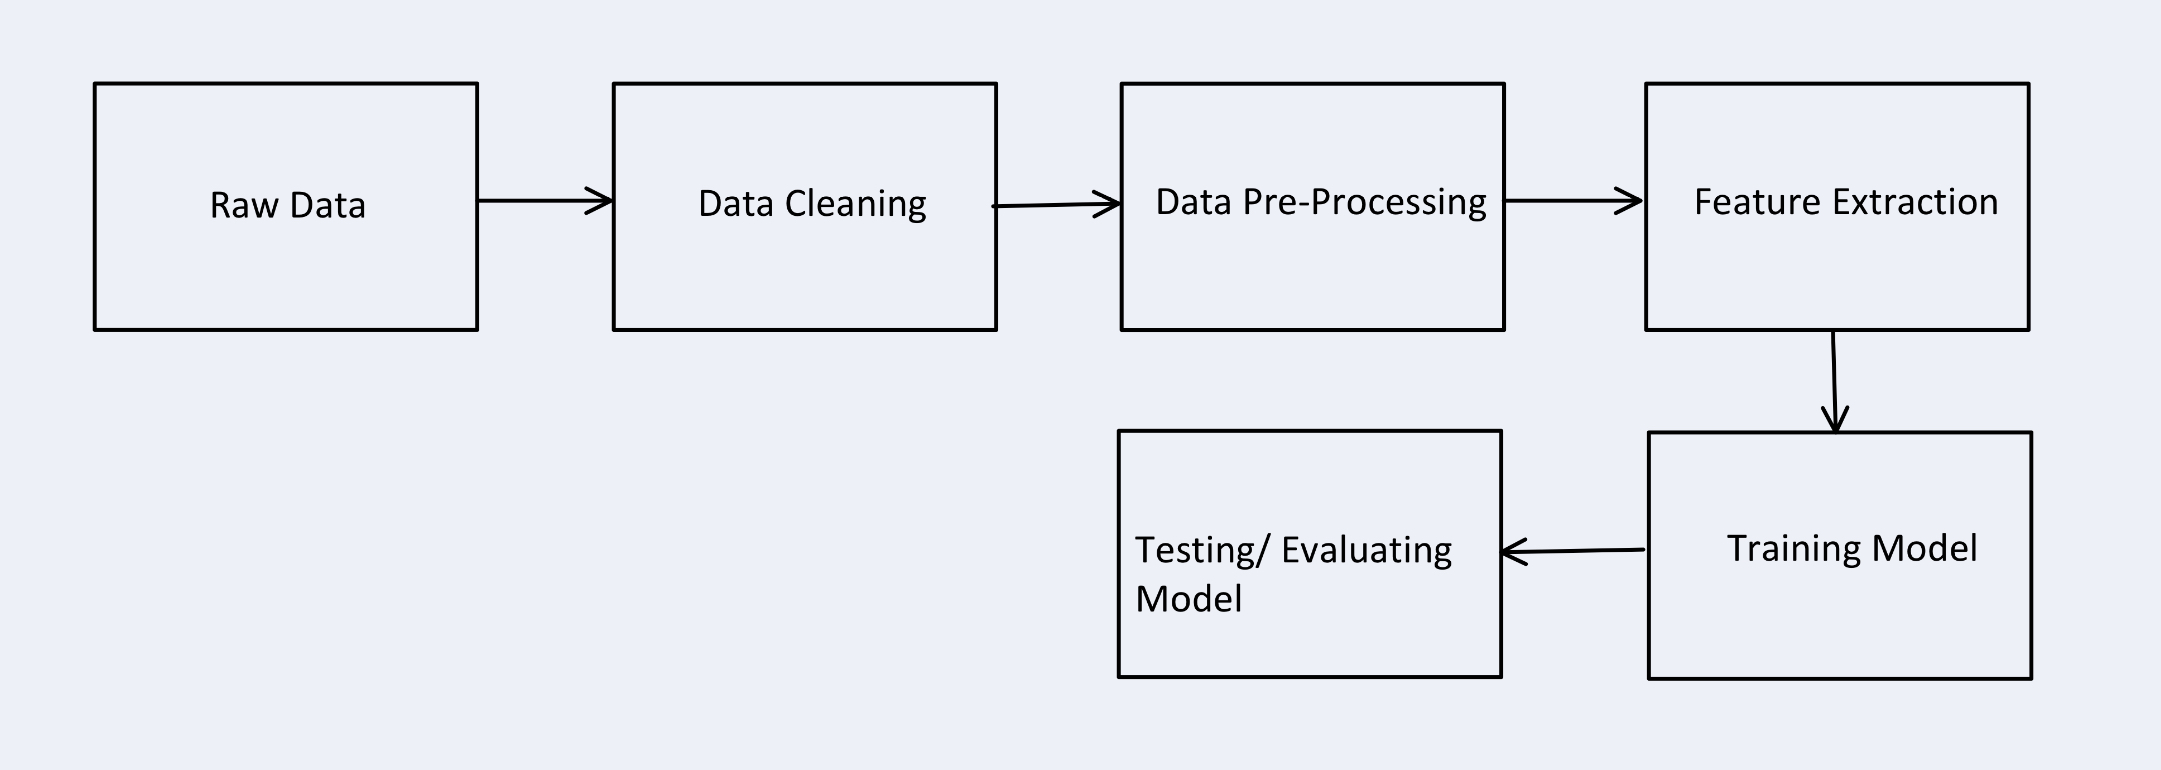

The pipeline of execution includes the above mentioned stages. The first stage is getting the raw data (fiiles) from the desired location and the final stage is checking how well our model has perfomed i.e checking the accuracy of our model. After getting the raw data follows Data cleaning where we remove some files with very bad file structure. Later in data pre-processing we rename all the wrongly named files and get 2 unique song names in the files. Next we extract the features which are also the input to our model. Then comes training different models and evaluating the performance of these models. 

# 4 Transformation stage


For our problem statement, to identify the song 'Potter' and 'StarWars', we have used the follwing features:-
Features used to train our classifiers


1.   Power (Tested but not used)
2.   Pitch mean.
3.   Pitch standard deviation.
4.   Fraction of voiced region.
5.   MFCCs (Tested for various n_components but used only '5')
6.   Chromagram 
7.   Mel   (Used in Advanced solution where we are dealing with musical scales)
             
8.   Zero Crossing Rate (Tested but not used)
9.   Spectral Roll-Off  (Tested but not used)


MFCCs:- 
The mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10-20) which concisely describe the overall shape of a spectral envelope. 
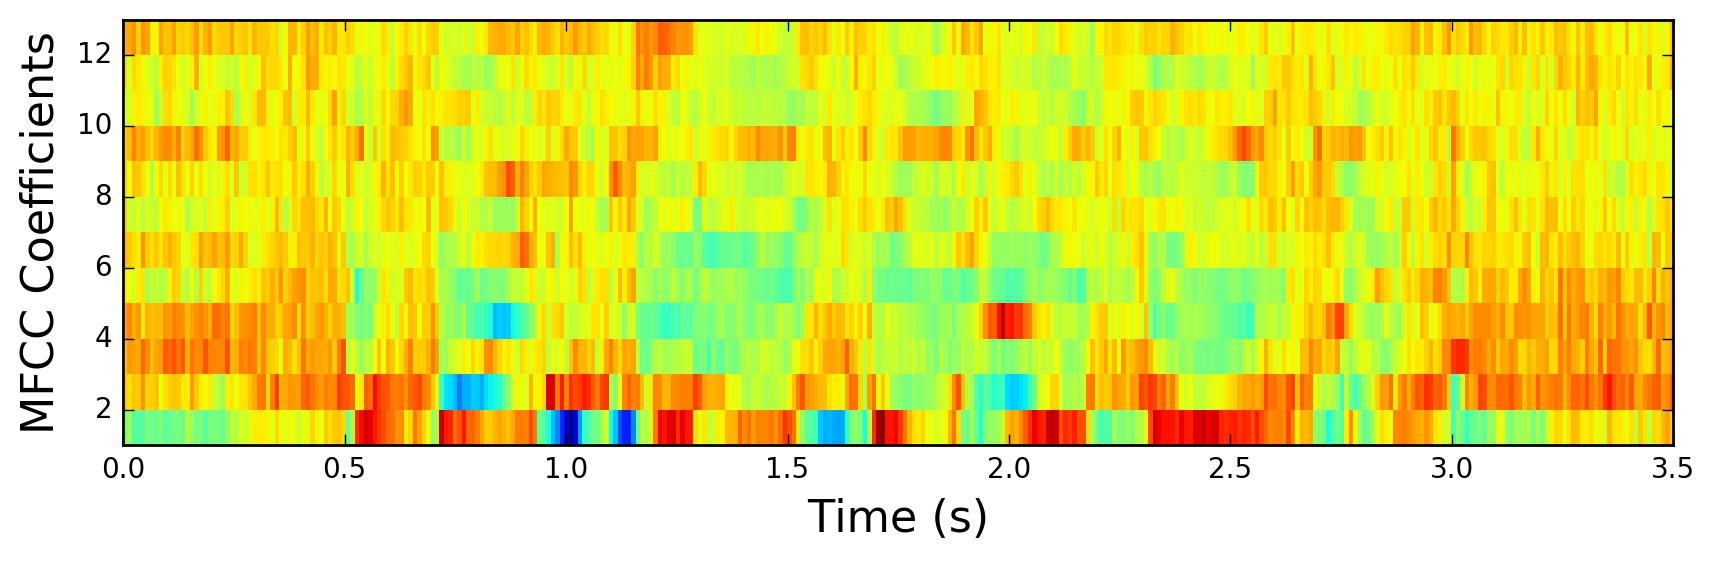

Chromagram:- 
The Chroma value of an audio basically represent the intensity of the twelve distinctive pitch classes that are used to study music. Hence we have decided to use the chroma features in our audio classification problem.

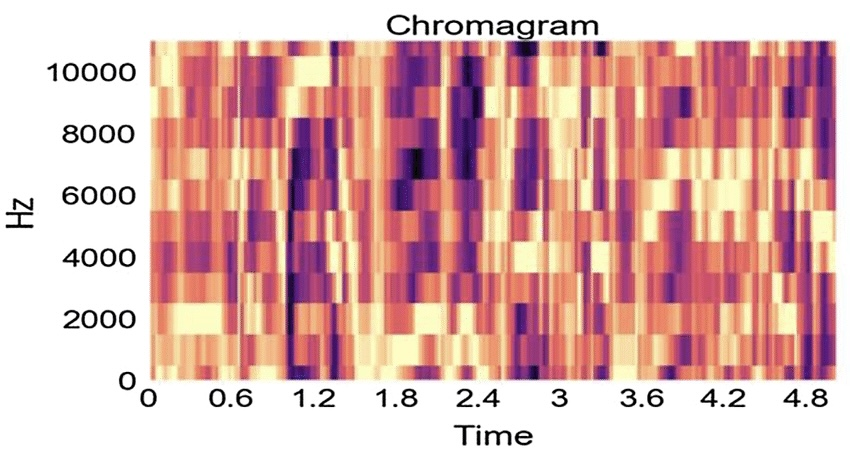


Mel:- 

The Mel scale aim to mimic non-linear human ear perception of sound. Human ears are more discriminative at lower frequencies and less discriminative at higher frequencies. Mel filter banks do exactly that by giving a better resolution at low frequencies and less at high. Hence to make our model understand the audio better (from a human's perspective) we have added mel spectogram as a feature to our model.

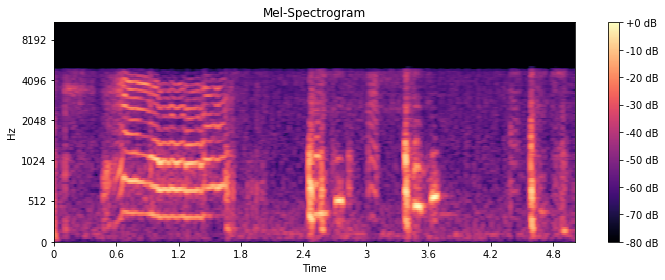

The inputs of our model are the features that we just saw above.

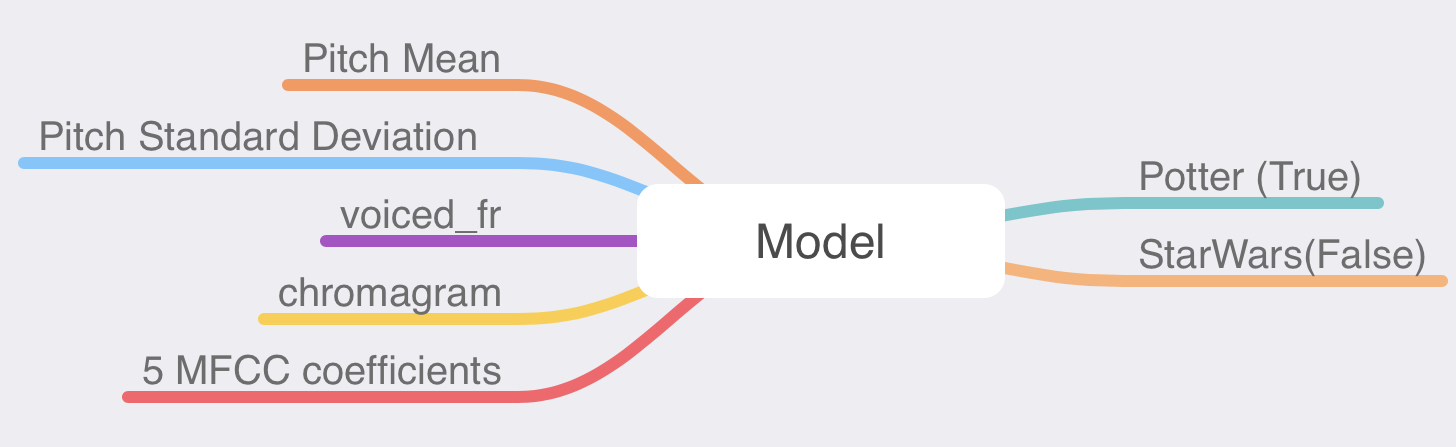

# 5 Modelling


<h3> We have used three models to train our data. The SVM which is the Support Vector Machine, the Random Forrest and the MLP Classifier (the Multi Layer Perceptron). All of these are classifiers that means the output of these  models will be a class i.e True or False (Potter or StarWars in our case).

1) SVM (Support Vector Machine)

The first model we have used is the support vector machine. The idea of SVM is simple: The algorithm creates a line or a hyperplane which separates the data into classes. This is available from the sklearn library to be directly imported and used.


2) Random Forrest Classifier 

Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset.

3) MLP Classifier

Multi-layer Perceptron classifier in the name itself connects to a Neural Network. Unlike other classification algorithms such as Support Vectors or Random Forrest Classifier, MLPClassifier relies on an underlying Neural Network to perform the task of classification.

One similarity though, with Scikit-Learn’s other classification algorithms is that implementing MLPClassifier takes no more effort than implementing Support Vectors or RF or any other classifiers from Scikit-Learn. 

A multilayer perceptron (MLP) is a feedforward artificial neural network that generates a set of outputs from a set of inputs. An MLP is characterized by several layers of input nodes connected as a directed graph between the input and output layers. MLP uses backpropogation for training the network. </h3>

# 6 Methodology

<h3>
To train the model we are using the 70% split data (split using train_test_split) and for validationn we are using the remaining 30% of data. After the feature extraction process (9 features), the data is passed through the classifier models. After these models are trained we use them to make predictions on the validation data. To evaluate the performance od the model we use the accuracy measure (calculated by correct prediction out of all predictions). Further to get a greater idea about the model, we print out the confusion matrix. </h3>

# 7 Dataset

<h3>We have used data from the Mile End Hums and Whistle dataset for two classes, Potter and Starwars. This dataset was stored on google drive and is extracated directly from the drive. Our data contained a lot of wrongly named files. In the coming sections such files have bee taken care of. Some files with very bad bad file structure (namely 1 or 2) have been removed and the other files have been renamed acccording to the standard nomenclature that was provided by the professor. Such files can cause a lot of misclassifications and degrade the performance of our model. This means that data cleaning and data processing are one of the most salient steps in a machine learning project pipeline. </h3>

## 1-   Importing necessary libraries and loaading our data

In [ ]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# directory_to_extract_to = '/content/drive/MyDrive/Data/MLEndHW/sample/'
# zip_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_Sample.zip'
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(directory_to_extract_to)

sample_path = '/content/drive/MyDrive/data_potter_starwars/*.wav'
files = glob.glob(sample_path)
len(files)

731

In [ ]:
print('The full path to the first audio file is: ', files[0])
print('\n')
print('The name of the first audio file is: ', files[0].split('/')[-1])
print('    The participand ID is: ', files[0].split('/')[-1].split('_')[0])
print('    The type of interpretation is: ', files[0].split('/')[-1].split('_')[1])
print('    The interpretation number is: ', files[0].split('/')[-1].split('_')[2])
print('    The song is: ', files[0].split('/')[-1].split('_')[3])

The full path to the first audio file is:  /content/drive/MyDrive/data_potter_starwars/S198_whistle_2_StarWars.wav


The name of the first audio file is:  S198_whistle_2_StarWars.wav
    The participand ID is:  S198
    The type of interpretation is:  whistle
    The interpretation number is:  2
    The song is:  StarWars.wav


## 2 - Handling data (Remvoing some files with bad file structure and correcting file names for the rest of the files)

In [ ]:
MLENDHW_table = [] 

for file in files:
    file_name = file.split('/')[-1]
    participant_ID = file.split('/')[-1].split('_')[0]
    interpretation_type = file.split('/')[-1].split('_')[1]
    interpretation_number = file.split('/')[-1].split('_')[2]
    song = file.split('/')[-1].split('_')[3].split('.')[0]

    if interpretation_type in ['Whistle','whislte','whisle','whistle']:
      interpretation_type = 'whistle'
    if interpretation_type in ['Hum']:
      interpretation_type = 'hum'
    if song in ['StarWars','Starwars','starwars','StartWars','imperial','Star wars','StarsWars','Imperial','star wars','starwar','star']:
      song = 'StarWars'
    if song in ['Potter','potter','Potterwav','harry potter','Potter ','Harry']:
      song = 'Potter'

    if song.isnumeric() == False and interpretation_number.isnumeric() == True:
      MLENDHW_table.append([file_name,participant_ID,interpretation_type,interpretation_number, song])
    else:
      os.remove(file)

#MLENDHW_table

Adding the data to a pandas dataframe to visualise it better

In [ ]:
MLENDHW_df = pd.DataFrame(MLENDHW_table,columns=['file_id','participant','interpretation','number','song']).set_index('file_id') 
MLENDHW_df

,participant,interpretation,number,song
file_id,,,,
S198_whistle_2_StarWars.wav,S198,whistle,2,StarWars
S190_hum_2_StarWars.wav,S190,hum,2,StarWars
S122_hum_2_StarWars.wav,S122,hum,2,StarWars
S122_whistle_2_StarWars.wav,S122,whistle,2,StarWars
S198_hum_2_StarWars.wav,S198,hum,2,StarWars
...,...,...,...,...
S47_hum_1_potter.wav,S47,hum,1,Potter
S153_hum_2_Potter.wav,S153,hum,2,Potter
S161_whistle_2_Potter.wav,S161,whistle,2,Potter


Checking unique file names to make sure we do not have fiiles with incorrect structure (This will avoid misclassification while training)

In [ ]:
for col in MLENDHW_df:
  print(MLENDHW_df[col].unique())

['S198' 'S190' 'S122' 'S100' 'S201' 'S131' 'S200' 'S196' 'S176' 'S216'
 'S84' 'S21' 'S187' 'S26' 'S111' 'S177' 'S19' 'S53' 'S70' 'S108' 'S28'
 'S77' 'S202' 'S137' 'S214' 'S199' 'S101' 'S222' 'S197' 'S121' 'S92'
 'S170' 'S59' 'S142' 'S210' 'S56' 'S15' 'S2' 'S65' 'S153' 'S128' 'S47'
 'S107' 'S57' 'S218' 'S204' 'S206' 'S3' 'S54' 'S23' 'S86' 'S34' 'S39'
 'S174' 'S69' 'S167' 'S12' 'S66' 'S123' 'S50' 'S140' 'S90' 'S179' 'S171'
 'S76' 'S209' 'S126' 'S64' 'S30' 'S74' 'S130' 'S25' 'S154' 'S191' 'S188'
 'S29' 'S136' 'S181' 'S203' 'S4' 'S158' 'S7' 'S116' 'S219' 'S38' 'S129'
 'S80' 'S221' 'S125' 'S160' 'S135' 'S157' 'S159' 'S163' 'S207' 'S72'
 'S166' 'S110' 'S16' 'S169' 'S51' 'S150' 'S40' 'S189' 'S102' 'S89' 'S68'
 'S103' 'S175' 'S85' 'S143' 'S52' 'S87' 'S115' 'S132' 'S46' 'S205' 'S18'
 'S161' 'S141' 'S155' 'S173' 'S31' 'S144' 'S156' 'S165' 'S212' 'S192'
 'S32' 'S193' 'S67' 'S127' 'S36' 'S13' 'S168' 'S182' 'S73' 'S195' 'S91'
 'S62' 'S118' 'S22' 'S185' 'S213' 'S45' 'S58' 'S10' 'S152' 'S120' 'S97'
 

The unique classes for songs, interpretation type, interpretation type and the participant_ID are now correct. We can move forward to the feature extraction process, now that we have taken care of the file names

# 8 Results


Plotting our signal 

In [ ]:
n=0
fs = None # Sampling frequency. If None, fs would be 22050
x, fs = librosa.load(files[n],sr=fs)
t = np.arange(len(x))/fs
plt.plot(t,x)
plt.xlabel('time (sec)')
plt.ylabel('amplitude')
plt.show()
display(ipd.Audio(files[n]))

Output hidden; open in https://colab.research.google.com to view.

## 1 - FEATURE SET

In [ ]:
n=0
x, fs = librosa.load(files[n],sr=fs)
print('This audio signal has', len(x), 'samples')

This audio signal has 416816 samples


Creating a function to extract the pitch of an audio file.

In [ ]:
def getPitch(x,fs,winLen=0.02):
  #winLen = 0.02 
  p = winLen*fs
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2
  f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                                 frame_length=frame_length,hop_length=hop_length)
  return f0,voiced_flag

## 2 - Extracting the features from our data

Creating a function to extract the 9 features that we finalised after testing different various permutations and comibations. Further this function will append true labels for the potter audio files and false labels for the starwars audio files. Hence creating 2 classes for the classification probelm. The label matrix will be an array with true and false values indicating a Pottter ot a Starwars sample.

In [ ]:
def getXy(files,labels_file, scale_audio=False, onlySingleDigit=False):
  X,y =[],[]
  xi = []
  for file in tqdm(files):
    fileID = file.split('/')[-1]
    file_name = file.split('/')[-1]
    yi = labels_file.loc[fileID]['song']=='Potter'  # Appending the true label as Potter

    fs = None # if None, fs would be 22050
    x, fs = librosa.load(file, res_type='kaiser_fast') #loading our files into an audio signal
    if scale_audio: x = x/np.max(np.abs(x))
    f0, voiced_flag = getPitch(x,fs,winLen=0.02)
    power = np.sum(x**2)/len(x)
    pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
    pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
    voiced_fr = np.mean(voiced_flag)

    # zcr = np.mean(librosa.feature.zero_crossing_rate(x))
    # S, phase = librosa.magphase(librosa.stft(x))
    # s_roll = np.mean(librosa.feature.spectral_rolloff(S=S, sr=fs))
    hop_length = 512
    chromagram = np.mean(librosa.feature.chroma_stft(x, sr=fs, hop_length=hop_length).T)
    mel = np.mean(librosa.feature.melspectrogram(x,sr=fs).T,axis=0)
    xi = [pitch_mean,pitch_std,voiced_fr,chromagram]
    mfccs = np.mean(librosa.feature.mfcc(y=x, sr=fs, n_mfcc=5).T,axis=0)
    #mfccs = np.append(mfccs,mel)
    new = np.append(xi,mfccs)
    y.append(yi)
    X.append(new)
  return np.array(X),np.array(y)

Extracting the features into an array X and the labels into an array y using the getXy function that we created above.

In [ ]:
import random
X,y = getXy(files, labels_file=MLENDHW_df, scale_audio=True, onlySingleDigit=True)

100%|██████████| 731/731 [41:12<00:00,  3.38s/it]


The next cell shows the shape of `X` and `y` and prints the labels vector `y`:

In [ ]:
print('The shape of X is', X.shape) 
print('The shape of y is', y.shape)
print('The labels vector is', y)


The shape of X is (731, 9)
The shape of y is (731,)
The labels vector is [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

We have visualised the number of samples with their corresponding labels and its frequency into our data. We have 365 Potter recordings and 366 StarWars recordings.

In [ ]:
print(' The number of Potter recordings is ', np.count_nonzero(y))
print(' The number of StarWars recordings is ', y.size - np.count_nonzero(y))

 The number of Potter recordings is  365
 The number of StarWars recordings is  366


## 3 - Comparing the performance of different classifiers

1. SVM
2. Random Forrest
3. MLP

### 3.1 - SVM

Splitting our data into 70% train and 30% test size.

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3)
X_train.shape, X_val.shape, y_train.shape, y_val.shape
X_train[0]  

array([ 4.03745649e+02,  3.31853495e+01,  7.71714066e-01,  1.89662218e-01,
       -2.90437317e+02,  8.72488632e+01, -3.69237900e+01,  7.62500143e+00,
        5.63054657e+01])

This is how our feature vector looks like (9 features)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0],-1)   # reshaping our data to fit our model

In [ ]:
model  = svm.SVC(C=19)
model.fit(X_train,y_train)
import pickle

yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
print('The support vectors are', model.support_vectors_.shape)

Training Accuracy 0.8395303326810176
Validation  Accuracy 0.6136363636363636
The support vectors are (416, 9)


We just trained our mnodel on the SVM classifier with the C value of 19 which is very high but gives us the best validation accuracy 61.36% and a training accuracy of 84%. We can say that this model is decent looking at our dataset's randomness. But in the next section we have normalized our data using the z score normalization and fit the data to an SVM with C=1 .

 Normalizing our data (Z-score normalization) and observing a change in the accuracy 

In [ ]:
mean = X_train.mean()
sd =  X_train.std()

X_train = (X_train-mean)/sd
X_val  = (X_val-mean)/sd

model  = svm.SVC(C=1,gamma=2)
model.fit(X_train,y_train)

yt_pn = model.predict(X_train)
yv_pn = model.predict(X_val)

print('Training Accuracy', np.mean(yt_pn==y_train))
print('Validation  Accuracy', np.mean(yv_pn==y_val))
print('The support vectors are', model.support_vectors_.shape)

Training Accuracy 0.9980430528375733
Validation  Accuracy 0.5045454545454545
The support vectors are (511, 9)


We can see that using a C value of 1 has reduced our validation accuracy from 61.3% to 50.4%. We further plot a confusion matrix to visualise the model's actual performance (visualising misclassifications).

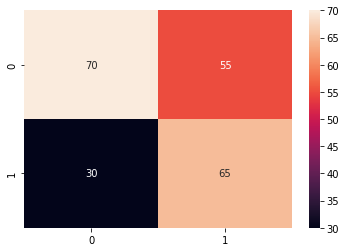

In [ ]:

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_val, yv_p)
import seaborn as sns
sns.heatmap(cnf_matrix, annot=True)

### 3.2 - Creating a Random Forrest Classifier 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#clf = RandomForestClassifier(max_depth=6, random_state=45) 
clf = RandomForestClassifier(max_depth=14, random_state=45)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=14, random_state=45)

In [ ]:
yt_p1 = clf.predict(X_train)
yv_p1 = clf.predict(X_val)
print('Training Accuracy', np.mean(yt_p1==y_train))
print('Validation  Accuracy', np.mean(yv_p1==y_val))

Training Accuracy 1.0
Validation  Accuracy 0.6772727272727272


In the above code we have fit our feature vector data into a Random Forest Classifier. With multiple trying and testing the hyperparameters max_depth (depth of the trees) and the random_state have been tuned to 14 and 45 respectively. This combination has given the best testing accuracy of 67.7 %. This model seems to have performed better than the SVM classifier and has a pretty decent accuracy (highest among all the models tested). We further plot a confusion matrix to visualise the model's actual performance (visualising misclassifications).

In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_val, yv_p1)

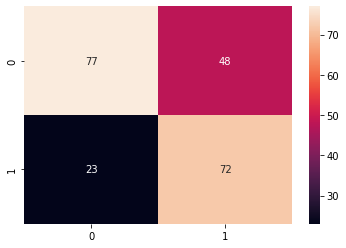

In [ ]:
import seaborn as sns
sns.heatmap(cnf_matrix, annot=True)

###  3.3 - Creating an MLP Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(solver='sgd', alpha=1e-5,hidden_layer_sizes=(256, ), random_state=35)
clf_mlp.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(256,), random_state=35,
              solver='sgd')

In [ ]:
yt_p_mlp = clf_mlp.predict(X_train)
yv_p_mlp = clf_mlp.predict(X_val)

print('Training Accuracy', np.mean(yt_p_mlp==y_train))
print('Validation  Accuracy', np.mean(yv_p_mlp==y_val))

Training Accuracy 0.6125244618395304
Validation  Accuracy 0.5636363636363636


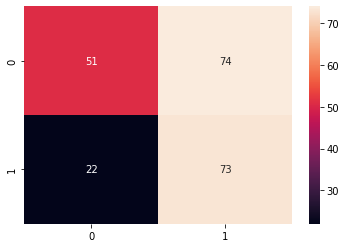

In [ ]:

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_val, yv_p_mlp)
import seaborn as sns
sns.heatmap(cnf_matrix, annot=True)

In the above code we have fit our feature vector data into an MLP Classifier. With multiple trying and testing the hyperparameters hidden_layer_size (depth of the neural  network) and the random_state have been tuned to (256,) and 35 respectively. This combination has given the best testing accuracy of 56.36 % and a training accuracy of 61.25%. This model seems to have performed better than the SVM classifier with C=1 and has very little overfitting (best among all the models tested). We further plot a confusion matrix to visualise the model's actual performance (visualising misclassifications).

# 9 Conclusions

In [ ]:
import pandas as pd

data = [['SVM',np.mean(yt_p == y_train), np.mean(yv_p == y_val)], ['Random Forrest',np.mean(yt_p1==y_train), np.mean(yv_p1==y_val)],['MLP', np.mean(yt_p_mlp==y_train), np.mean(yv_p_mlp==y_val)]]

# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['Classifier', 'Performance Training', 'Performance Testing'])

# print dataframe.
df

,Classifier,Performance Training,Performance Testing
0,SVM,0.839530,0.613636
1,Random Forrest,1.000000,0.677273
2,MLP,0.612524,0.563636


<h1>Conclusion:- </h1>

<h3>
In this project we have performed binary classfication of data based on various audio input features that we extract .
On completion of our project we have made a model that helps us identify if an audio file is potter or starwars. For a different class of file the model will work but give an output based on the similarity of features between the training files and our test file.
With a lot of trying and testing the hyperparameters of all the three models have been tuned to get maximum validation accuracy.

<h3>Looking at the above table we can say that accuracy wise the Random Forrest classifier was the best out of all the three models that we tested. Inspite of adding novel features the accuracy of the model did not increase more than 67%. It can be said that the quality of data that we are dealing with is a factor in limiting our accuracy at a certain limit. Also the model with least overfitiing among all was the MLP classifier as there is very little difference between the training and testing accuracy. </h3>